In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Lambda
from keras.layers import Embedding
from keras import regularizers
from keras.layers import RNN
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
#import scikits.statsmodels.api as sm
from sklearn.utils import class_weight
from sklearn.metrics import f1_score

In [0]:
#import data
#code from https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     # 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [19]:
#code from https://stackoverflow.com/questions/48485255/how-can-access-uploaded-file-in-google-colab
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file train_x_10lags_005.csv


In [20]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file cv_x_10lags_005.csv


In [29]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file train_x_10lags_005.csv


In [30]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file cv_x_10lags_005.csv


In [0]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file train_x_3lags.csv


In [0]:
from google.colab import files

uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

('saved file', u'dev_x.csv')


In [0]:
## ALL RNN CODE including much data preparation 
## inspired by or very closely following Jason Brownlee's website
## https://machinelearningmastery.com

In [0]:
#reshape data
'''data = pd.read_csv('train_x.csv')
data=np.array(data)
train_x, train_y = data[:, 1:-1], data[:, -1]
train_x = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
devdata = pd.read_csv('dev_x.csv')
devdata=np.array(devdata)
cv_X, cv_y = devdata[:, 1:-1], devdata[:, -1]
cv_X = cv_X.reshape(cv_X.shape[0], 1, cv_X.shape[1])

data_nr = pd.read_csv('train_x_noresid.csv')
data_nr=np.array(data_nr)
nr_train_x, nr_train_y = data_nr[:, 1:-1], data_nr[:, -1]
nr_train_x = nr_train_x.reshape(nr_train_x.shape[0], 1, nr_train_x.shape[1])
devnrdata = pd.read_csv('dev_x_noresid.csv')
devnrdata=np.array(devnrdata)
nr_cv_X, nr_cv_y = devnrdata[:, 1:-1], devnrdata[:, -1]
nr_cv_X = nr_cv_X.reshape(nr_cv_X.shape[0], 1, nr_cv_X.shape[1])
'''
data_tl = pd.read_csv('train_x_10lags_005.csv')
data_tl=np.array(data_tl)
tl_train_x, tl_train_y = data_tl[:, 1:-1], data_tl[:, -1]
tl_train_x = tl_train_x.reshape(tl_train_x.shape[0], 1, tl_train_x.shape[1])
devtldata = pd.read_csv('cv_x_10lags_005.csv')
devtldata=np.array(devtldata)
tl_cv_X, tl_cv_y = devtldata[:, 1:-1], devtldata[:, -1]
tl_cv_X = tl_cv_X.reshape(tl_cv_X.shape[0], 1, tl_cv_X.shape[1])


In [0]:
#function to generate confusion matrix
#code from sklearn documentation http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

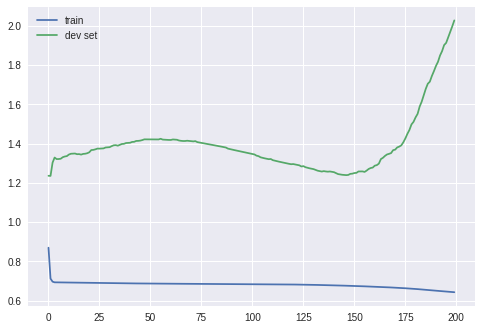

layer size: 48
Train Accuracy: 61.56%
CV Accuracy: 53.24%


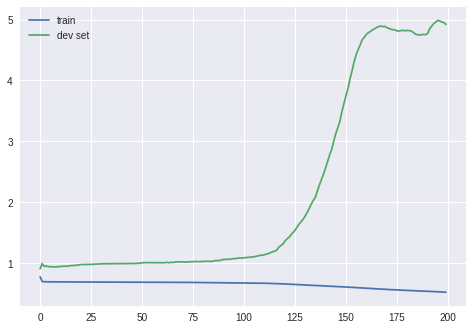

layer size: 34
Train Accuracy: 69.24%
CV Accuracy: 46.63%


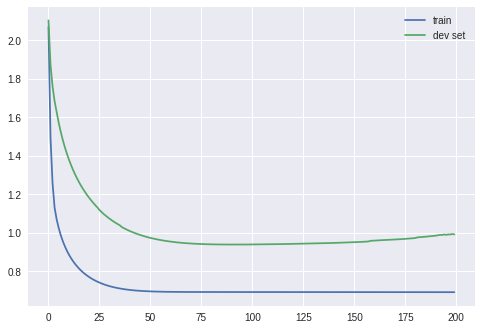

layer size: 1
Train Accuracy: 51.75%
CV Accuracy: 52.98%


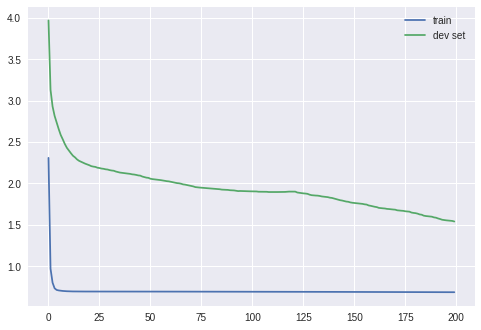

layer size: 1
Train Accuracy: 55.66%
CV Accuracy: 52.98%


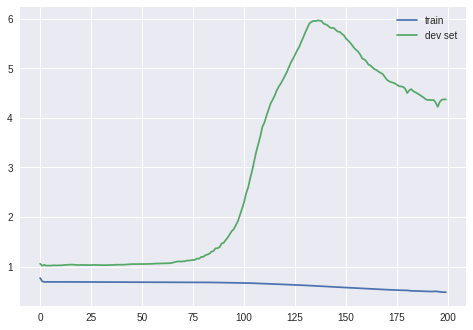

layer size: 39
Train Accuracy: 72.51%
CV Accuracy: 46.42%


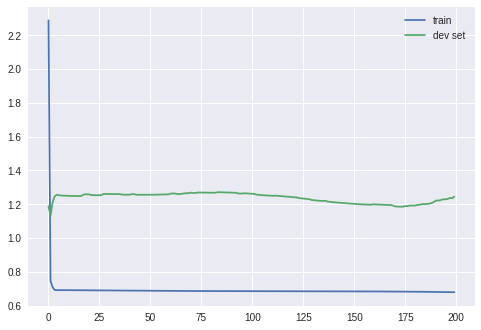

layer size: 45
Train Accuracy: 57.55%
CV Accuracy: 53.02%


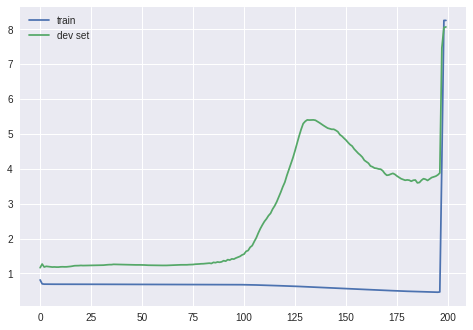

layer size: 96
Train Accuracy: 0.00%
CV Accuracy: 7.34%


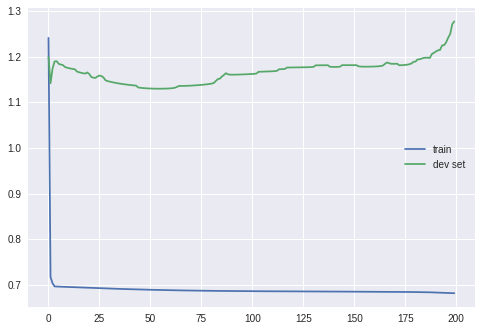

layer size: 18
Train Accuracy: 56.53%
CV Accuracy: 53.02%


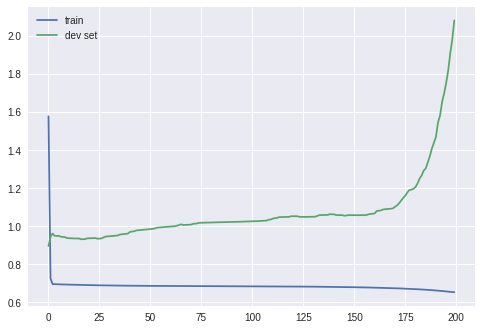

layer size: 18
Train Accuracy: 60.08%
CV Accuracy: 52.85%


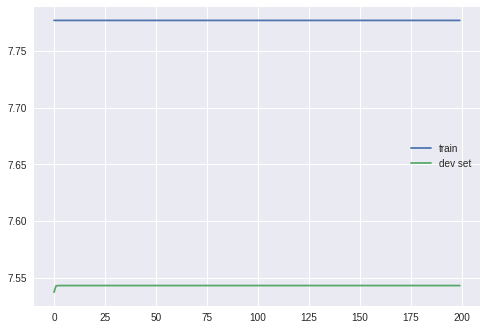

layer size: 81
Train Accuracy: 0.46%
CV Accuracy: 52.98%


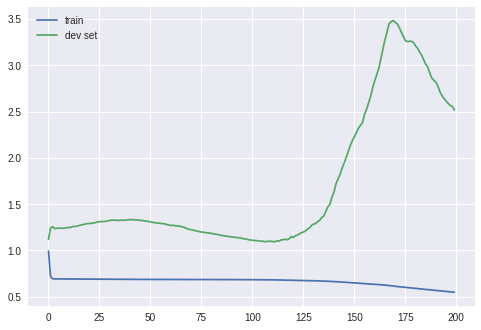

layer size: 88
Train Accuracy: 68.19%
CV Accuracy: 51.12%


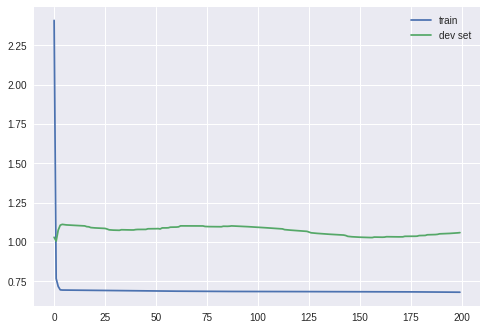

layer size: 41
Train Accuracy: 56.73%
CV Accuracy: 53.02%


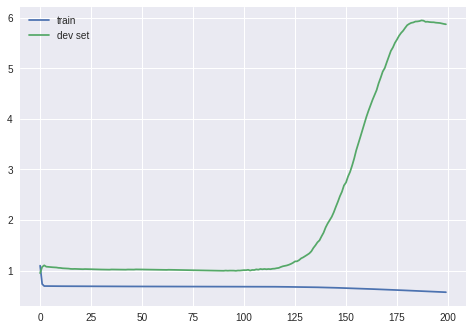

layer size: 85
Train Accuracy: 66.79%
CV Accuracy: 38.60%


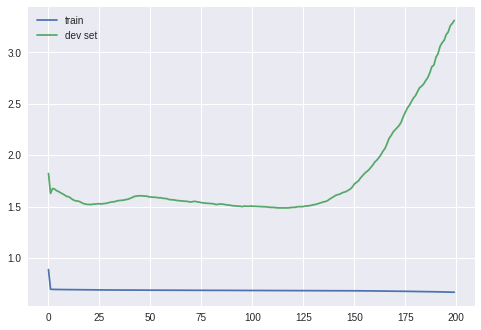

layer size: 10
Train Accuracy: 58.98%
CV Accuracy: 53.15%


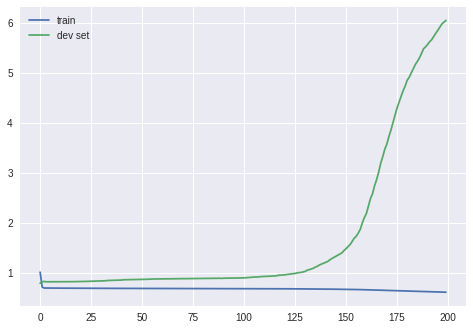

layer size: 30
Train Accuracy: 64.89%
CV Accuracy: 50.82%


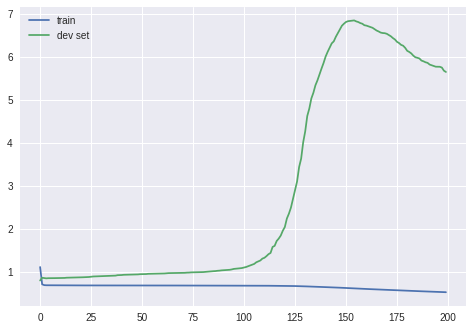

layer size: 94
Train Accuracy: 70.02%
CV Accuracy: 44.99%


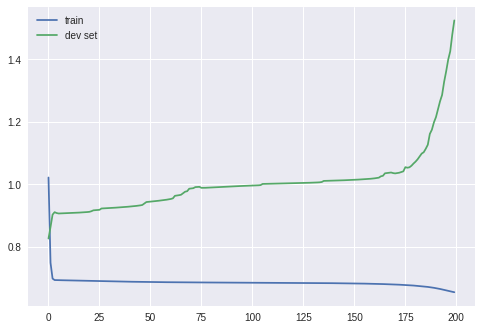

layer size: 67
Train Accuracy: 59.85%
CV Accuracy: 53.15%


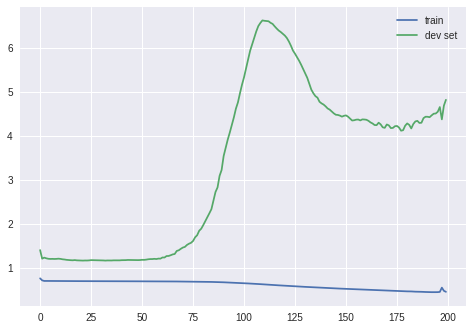

layer size: 39
Train Accuracy: 73.07%
CV Accuracy: 40.98%


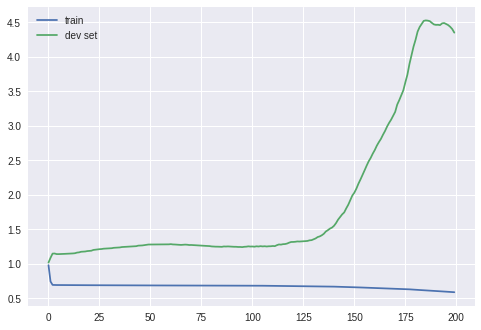

layer size: 98
Train Accuracy: 64.82%
CV Accuracy: 51.64%


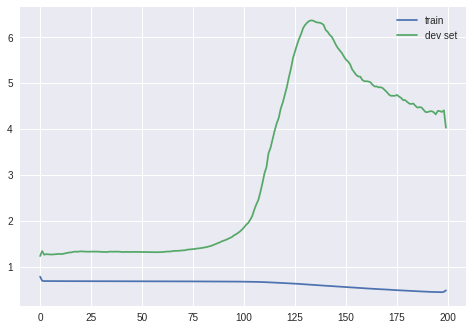

layer size: 59
Train Accuracy: 74.66%
CV Accuracy: 46.24%


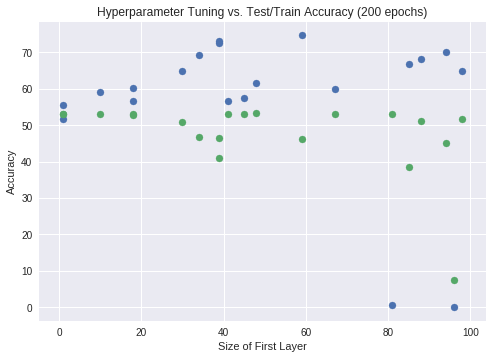

In [0]:
#determine first layer size
grid = 10**(np.random.rand(5,2)*2-1)
grid1 = np.random.rand(5)
grid2 = np.random.randint(1,100,size=20)
dropouts = []
regs = []
train_accs = []
cv_accs = []
size = []
#for i in grid[:,0]:
for i in grid2:
#for i in grid1:
    #for j in grid[:,1]:
        model = Sequential()
        model.add(LSTM(i, input_shape=(train_x.shape[1], train_x.shape[2])))
        #model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_regularizer=regularizers.l2(i)))
        #model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_dropout=i,recurrent_regularizer=regularizers.l2(j)))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(cv_X, cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        train_scores = model.evaluate(train_x, train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(cv_X, cv_y, batch_size=72, verbose=0)
        print("layer size: "+str(i))
        #print("regularization parameter: "+str(j))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        size.append(i)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
plt.scatter(size, train_accs,label='train acc')
plt.scatter(size, cv_accs,label='dev acc')
plt.xlabel('Size of First Layer')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning vs. Test/Train Accuracy (200 epochs)')
plt.show()

In [0]:
#weight classes
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))


60
50
40
30
30 ReLu
20
20 Relu
10
10 Relu
Dense
Dense


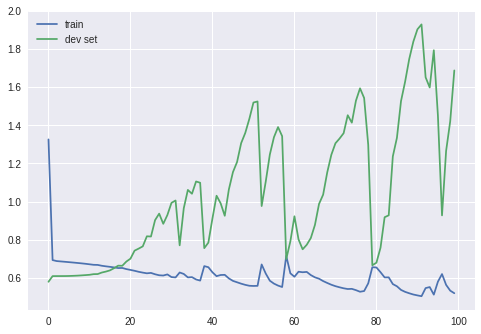

Normalized confusion matrix
[[0.80802792 0.19197208]
 [0.74098361 0.25901639]]


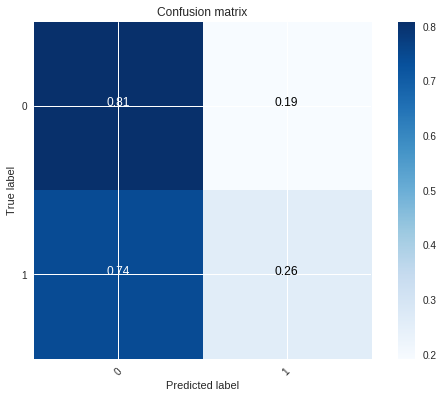

Num Layers: 9
Train Accuracy: 75.89%
CV Accuracy: 65.52%
30
10
Dense


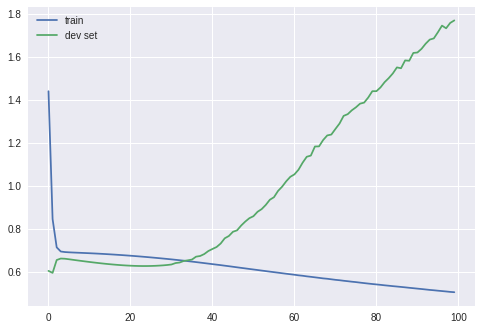

Normalized confusion matrix
[[0.73123909 0.26876091]
 [0.68852459 0.31147541]]


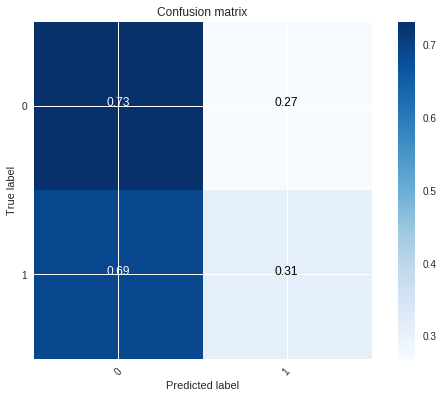

Num Layers: 4
Train Accuracy: 73.38%
CV Accuracy: 59.85%
60
60 Relu
50
50 ReLu
40
30
30 ReLu
10
Dense


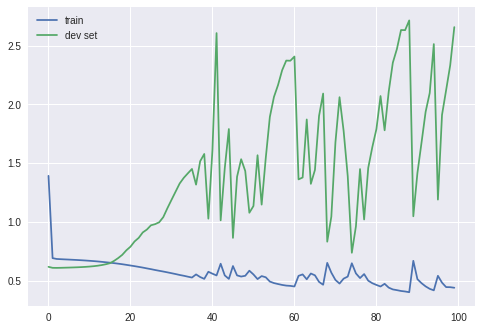

Normalized confusion matrix
[[0.72018615 0.27981385]
 [0.67704918 0.32295082]]


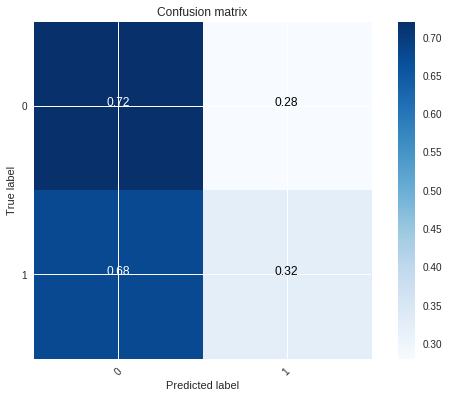

Num Layers: 7
Train Accuracy: 78.38%
CV Accuracy: 59.98%
10
10 Relu
Dense
Dense


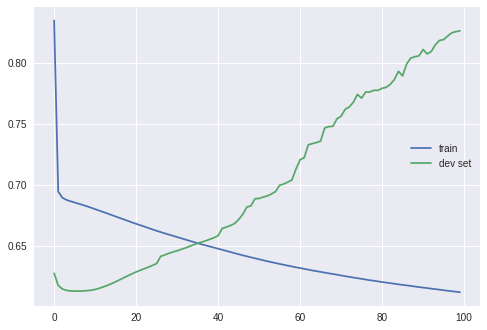

Normalized confusion matrix
[[0.74287376 0.25712624]
 [0.71147541 0.28852459]]


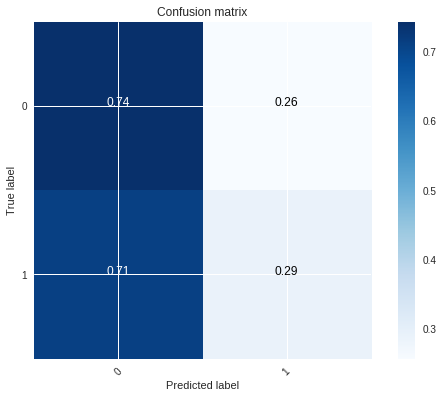

Num Layers: 4
Train Accuracy: 70.74%
CV Accuracy: 62.34%
50
50 ReLu
30
10
10 Relu
Dense
Dense


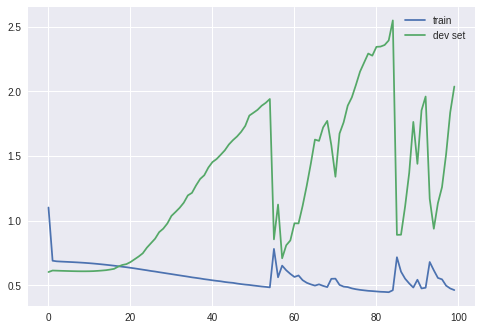

Normalized confusion matrix
[[0.72542176 0.27457824]
 [0.69344262 0.30655738]]


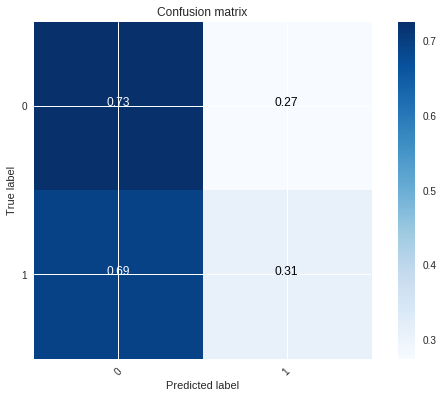

Num Layers: 6
Train Accuracy: 73.43%
CV Accuracy: 56.63%
50
50 ReLu
40
40 ReLu
30
30 ReLu
10
Dense
Dense


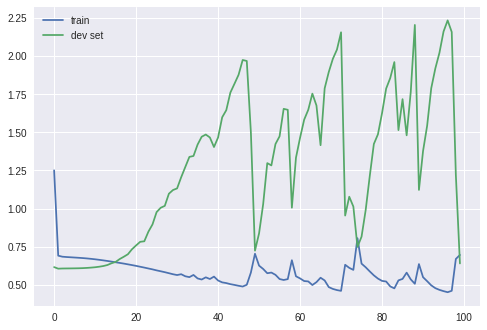

Normalized confusion matrix
[[0.95520652 0.04479348]
 [0.93770492 0.06229508]]


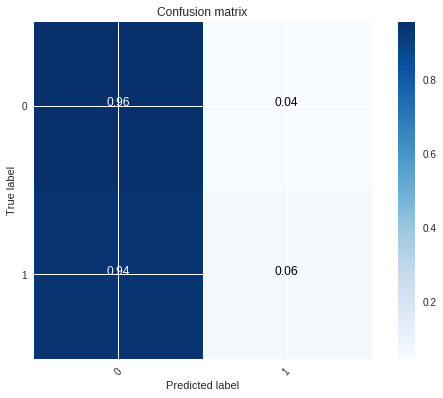

Num Layers: 7
Train Accuracy: 70.67%
CV Accuracy: 72.13%
60
60 Relu
40
20
10
Dense


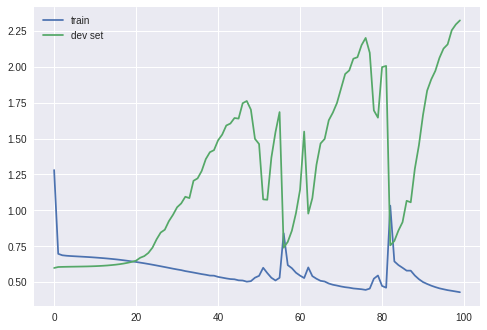

Normalized confusion matrix
[[0.7417103  0.2582897 ]
 [0.70327869 0.29672131]]


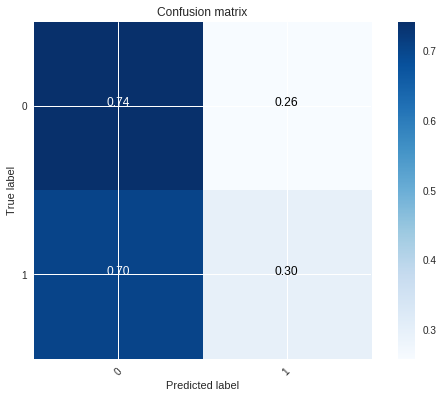

Num Layers: 6
Train Accuracy: 74.02%
CV Accuracy: 57.79%
60
60 Relu
50
20
10


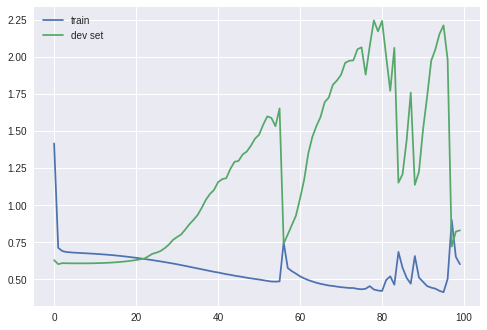

Normalized confusion matrix
[[0.7417103  0.2582897 ]
 [0.67704918 0.32295082]]


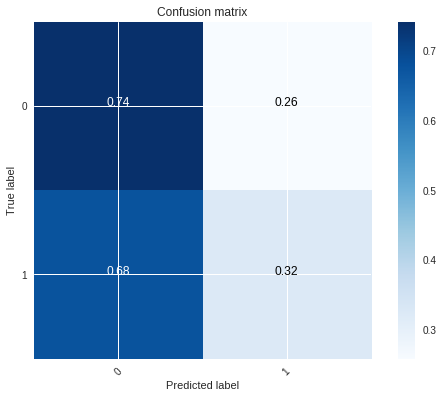

Num Layers: 5
Train Accuracy: 74.92%
CV Accuracy: 62.99%


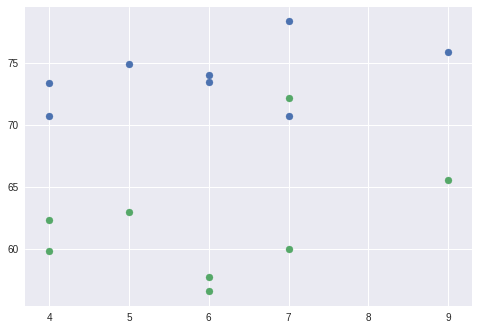

In [21]:
#architecture search
#number of layers search
nls = []
cv_accs = []
train_accs = []

#random search through architectures
for i in range(8):
        nl = 0
        model = Sequential()
        if np.random.randint(1,3)==2:
          print("60")
          nl += 1
          model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
          if np.random.randint(1,3)==2:
            print("60 Relu")
            model.add(LeakyReLU())
        if np.random.randint(1,3)==2:
          print("50")
          nl += 1
          model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
          if np.random.randint(1,3)==2:
            print("50 ReLu")
            model.add(LeakyReLU())
        if np.random.randint(1,3)==2:
          print("40")
          nl += 1
          model.add(LSTM(40, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
          if np.random.randint(1,3)==2:
            print("40 ReLu")
            model.add(LeakyReLU())
        if np.random.randint(1,3)==2:
          print("30")
          nl += 1
          model.add(LSTM(30, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
          if np.random.randint(1,3)==2:
            print("30 ReLu")
            model.add(LeakyReLU())
        if np.random.randint(1,3)==2:
          print("20")
          nl += 1
          model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
          if np.random.randint(1,3)==2:
            print("20 Relu")
            model.add(LeakyReLU())
        #if np.random.randint(1,3)==2:
        print("10")
        nl += 1
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=False))
        if np.random.randint(1,3)==2:
          print("10 Relu")
          model.add(LeakyReLU()) 
        #kernel_regularizer=regularizers.l2(j),
        #model.add(LSTM(60, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_regularizer=regularizers.l2(j),recurrent_dropout=i))
        if np.random.randint(1,3)==2:
          print("Dense")
          nl += 1
          model.add(Dense(10))
        if np.random.randint(1,3)==2:
          print("Dense")
          nl += 1
          model.add(Dense(10))
        model.add(Dense(1))
        nl += 1
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix 
        #code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("Num Layers: "+str(nl))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        nls.append(nl)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
plt.scatter(nls,train_accs)
plt.scatter(nls,cv_accs)
plt.show()

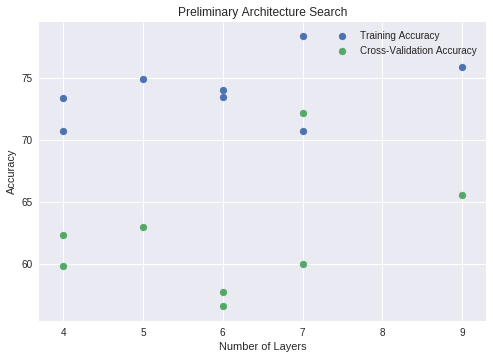

In [34]:
ta=plt.scatter(nls,train_accs)
ca=plt.scatter(nls,cv_accs)
plt.legend([ta,ca],['Training Accuracy','Cross-Validation Accuracy'])
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Preliminary Architecture Search')
plt.show()

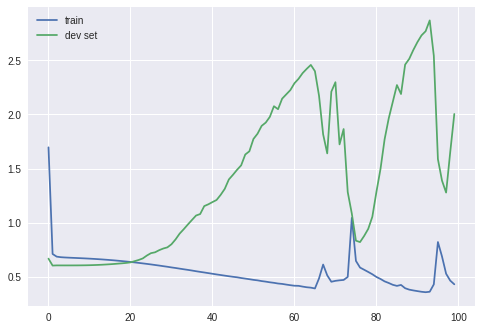

Normalized confusion matrix
[[0.80104712 0.19895288]
 [0.73442623 0.26557377]]


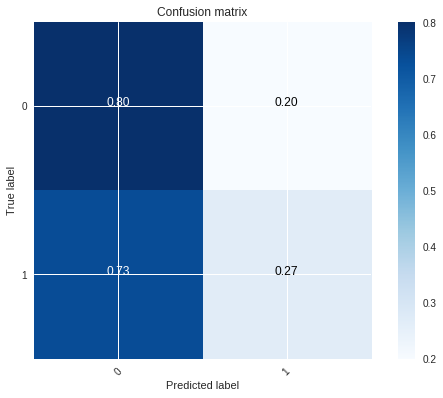

Num Layers: 6
Train Accuracy: 78.26%
CV Accuracy: 62.86%


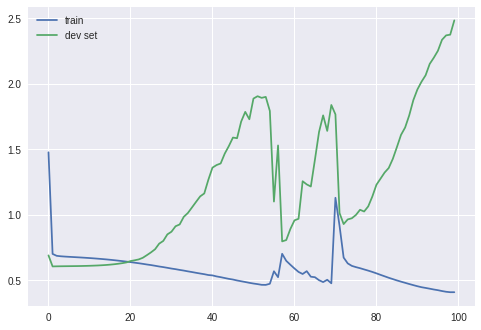

Normalized confusion matrix
[[0.7539267  0.2460733 ]
 [0.68360656 0.31639344]]


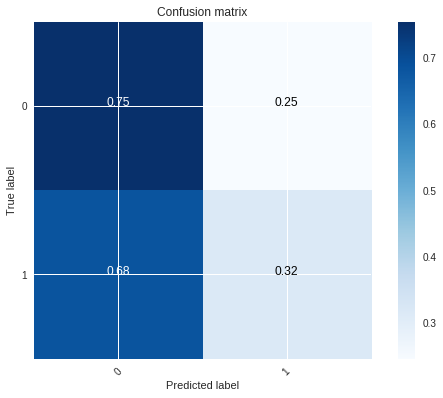

Num Layers: 7
Train Accuracy: 70.62%
CV Accuracy: 56.38%


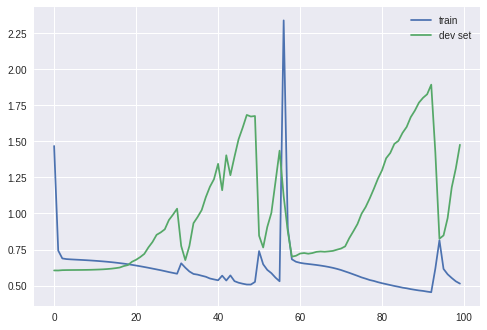

Normalized confusion matrix
[[0.76148924 0.23851076]
 [0.73114754 0.26885246]]


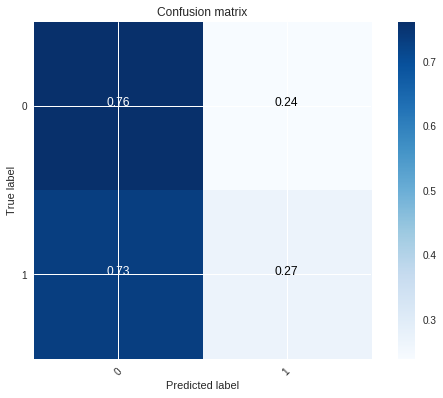

Num Layers: 8
Train Accuracy: 75.67%
CV Accuracy: 61.36%


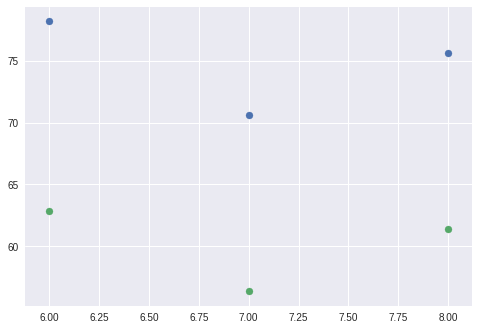

In [37]:
#architecture search
#does adding dense layers at the end help?
nls = []
cv_accs = []
train_accs = []
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

for i in range(3):
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        #model.add(LSTM(40, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        #model.add(LeakyReLU())
        #model.add(LSTM(30, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        #model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=False))
        #kernel_regularizer=regularizers.l2(j),
        #model.add(LSTM(60, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_regularizer=regularizers.l2(j),recurrent_dropout=i))
        if i==1:
          model.add(Dense(10))
        if i==2:
          model.add(Dense(10))
          model.add(Dense(10))
        model.add(Dense(1))
        nl += 1
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("Num Layers: "+str(nl))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        nls.append(nl)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
plt.scatter(nls,train_accs)
plt.scatter(nls,cv_accs)
plt.show()

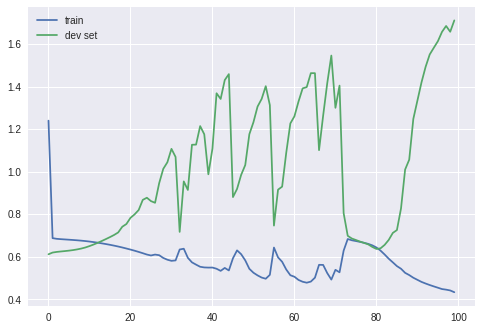

Normalized confusion matrix
[[0.6655032  0.3344968 ]
 [0.58196721 0.41803279]]


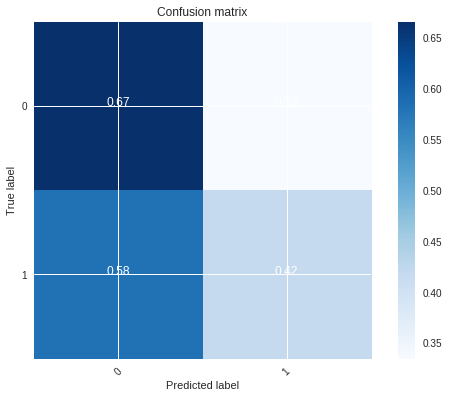

Num Layers: 10
Train Accuracy: 74.01%
CV Accuracy: 56.81%


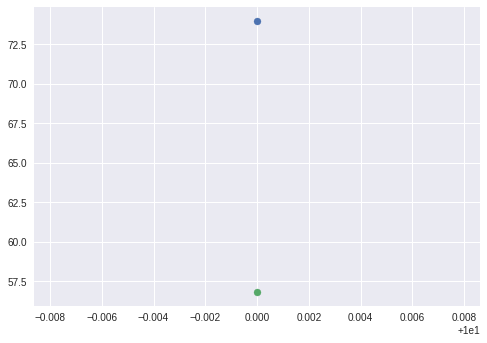

In [39]:
#architecture search
#does interspersing dense layers help?
nls = []
cv_accs = []
train_accs = []
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

for i in range(2):
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(Dense(60))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(Dense(50))
        #model.add(LSTM(40, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        #model.add(LeakyReLU())
        #model.add(LSTM(30, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        #model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(Dense(20))
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=False))
        #kernel_regularizer=regularizers.l2(j),
        #model.add(LSTM(60, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_regularizer=regularizers.l2(j),recurrent_dropout=i))
        model.add(Dense(1))
        nl += 1
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("Num Layers: "+str(nl))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        nls.append(nl)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
plt.scatter(nls,train_accs)
plt.scatter(nls,cv_accs)
plt.show()

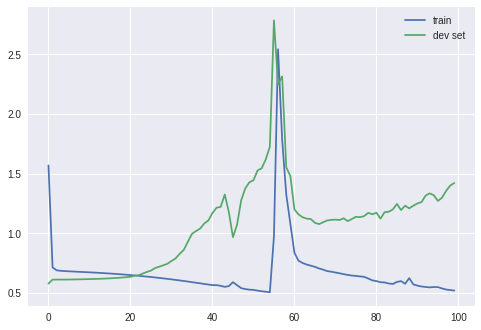

Normalized confusion matrix
[[0.78068645 0.21931355]
 [0.72786885 0.27213115]]


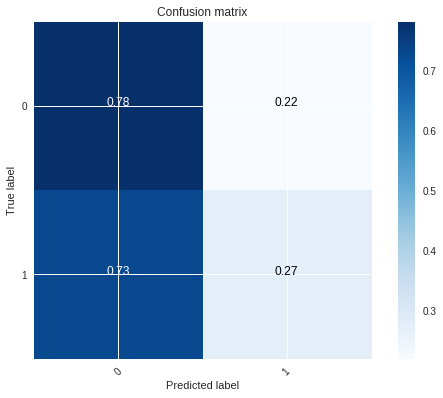

Num Layers: 16
Train Accuracy: 73.63%
CV Accuracy: 61.87%


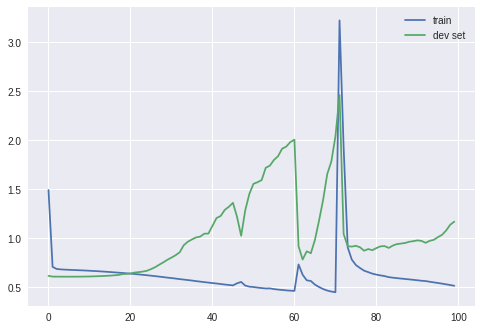

Normalized confusion matrix
[[0.76847004 0.23152996]
 [0.69016393 0.30983607]]


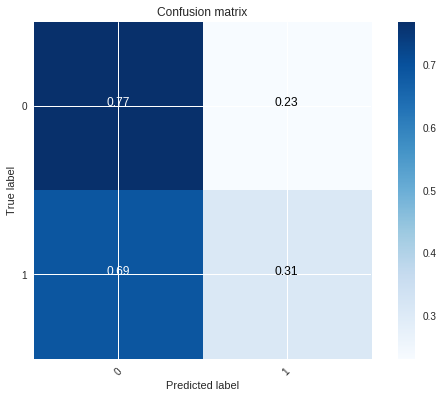

Num Layers: 17
Train Accuracy: 77.89%
CV Accuracy: 64.28%


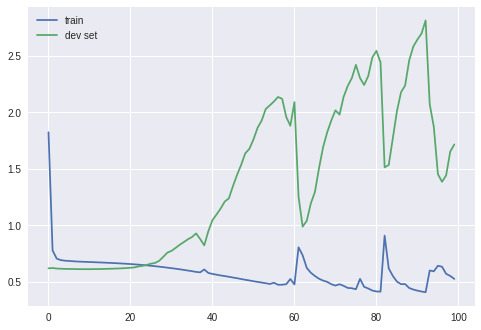

Normalized confusion matrix
[[0.70157068 0.29842932]
 [0.67377049 0.32622951]]


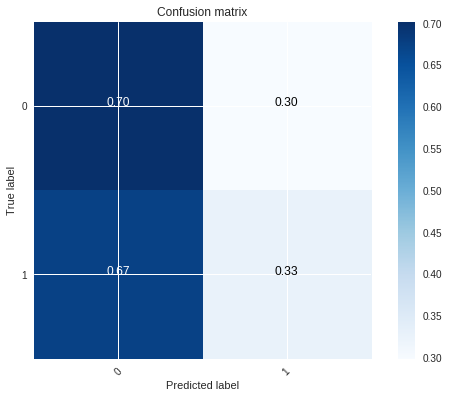

Num Layers: 18
Train Accuracy: 72.59%
CV Accuracy: 56.72%


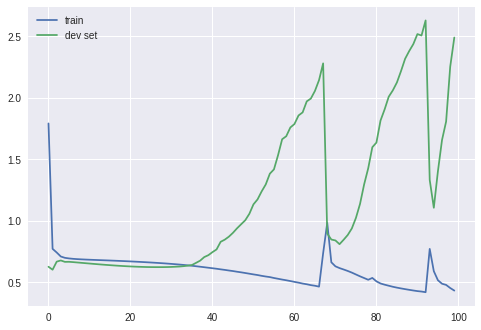

Normalized confusion matrix
[[0.69342641 0.30657359]
 [0.69016393 0.30983607]]


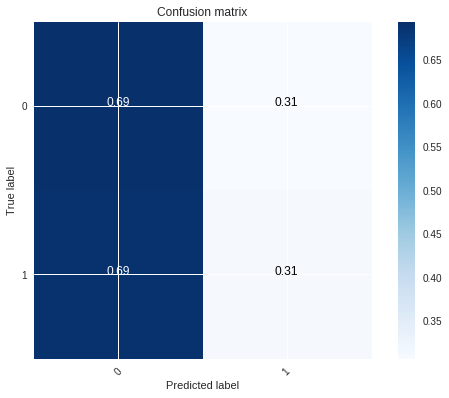

Num Layers: 19
Train Accuracy: 71.23%
CV Accuracy: 52.55%


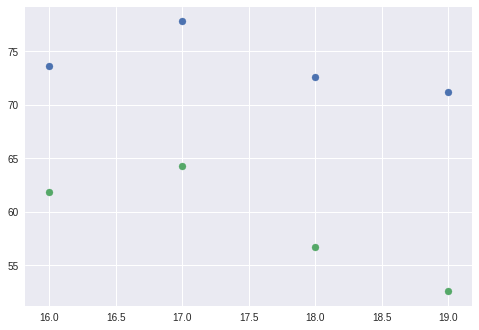

In [46]:
#architecture search
#relu vs tanh
#model 2 performs best - want tanh then relu
nls = []
cv_accs = []
train_accs = []
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

grid = np.random.rand()

for i in range(4):
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        if i == 1 or i == 3:
          model.add(LeakyReLU())
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        if i == 2 or i == 3:
          model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),return_sequences=False))
        #kernel_regularizer=regularizers.l2(j),
        #model.add(LSTM(60, input_shape=(train_x.shape[1], train_x.shape[2]),recurrent_regularizer=regularizers.l2(j),recurrent_dropout=i))
        model.add(Dense(1))
        nl += 1
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("Num Layers: "+str(nl))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        nls.append(nl)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
plt.scatter(nls,train_accs)
plt.scatter(nls,cv_accs)
plt.show()

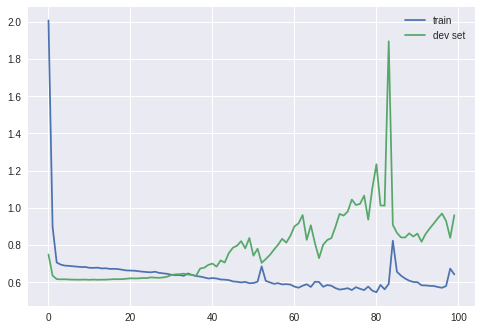

Normalized confusion matrix
[[0.5840605 0.4159395]
 [0.5147541 0.4852459]]


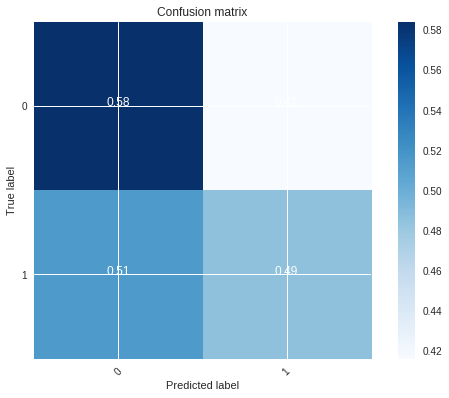

dropout parameter: 0.019028529758868096
regularization parameter: 0.0028699556712049757
Train Accuracy: 68.44%
CV Accuracy: 55.82%


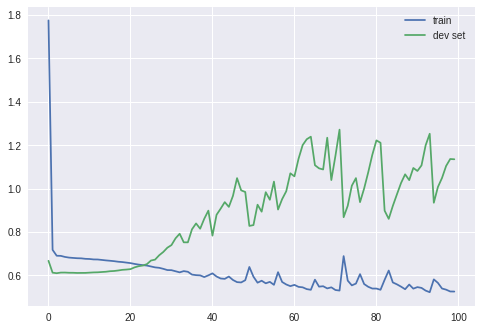

Normalized confusion matrix
[[0.76323444 0.23676556]
 [0.72131148 0.27868852]]


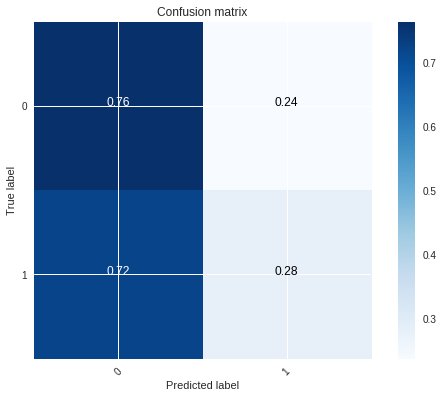

dropout parameter: 0.01602250113898648
regularization parameter: 0.004404584324603917
Train Accuracy: 78.51%
CV Accuracy: 63.59%


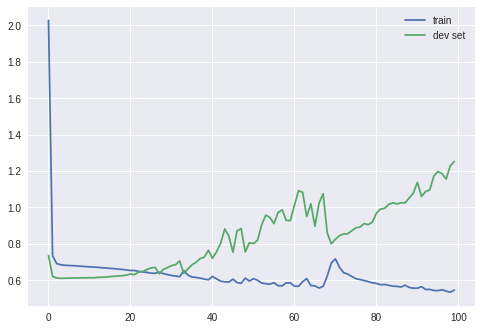

Normalized confusion matrix
[[0.7452007  0.2547993 ]
 [0.66721311 0.33278689]]


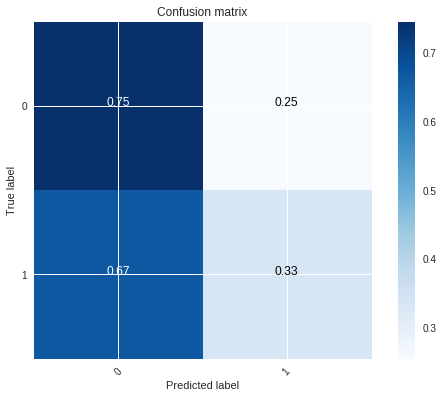

dropout parameter: 0.014899812256007538
regularization parameter: 0.013427882423956023
Train Accuracy: 77.32%
CV Accuracy: 63.72%


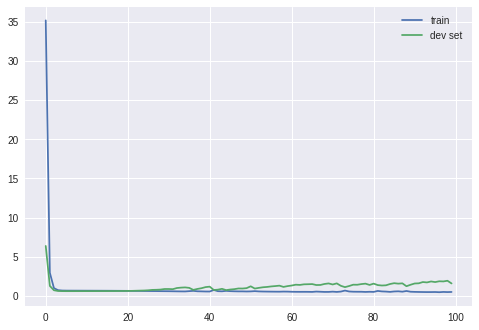

Normalized confusion matrix
[[0.81268179 0.18731821]
 [0.79180328 0.20819672]]


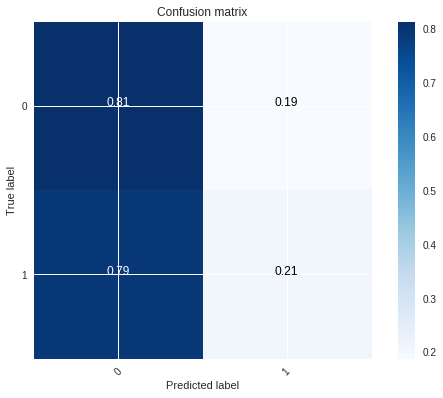

dropout parameter: 0.002754148270842311
regularization parameter: 0.7916847200336413
Train Accuracy: 75.19%
CV Accuracy: 62.82%


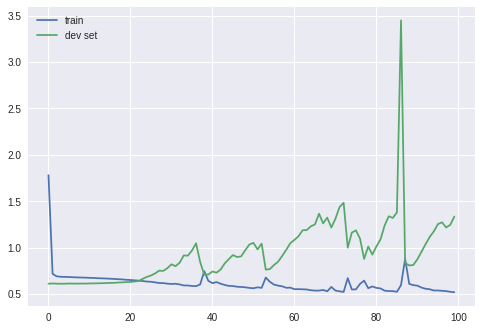

Normalized confusion matrix
[[0.7609075  0.2390925 ]
 [0.72295082 0.27704918]]


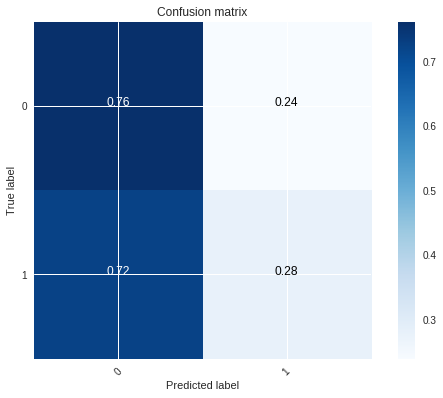

dropout parameter: 0.006951624122237921
regularization parameter: 0.003983578116275616
Train Accuracy: 74.25%
CV Accuracy: 61.23%


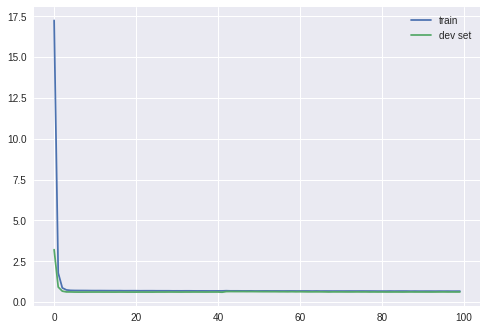

Normalized confusion matrix
[[0.91913903 0.08086097]
 [0.8852459  0.1147541 ]]


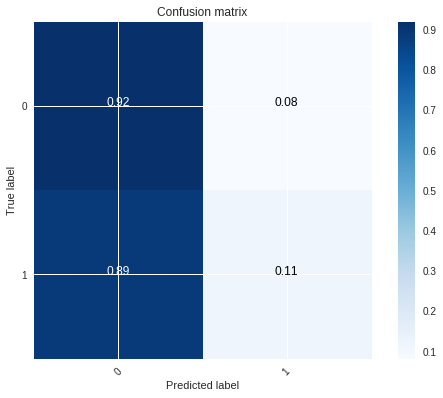

dropout parameter: 0.33053998702376297
regularization parameter: 0.36804714669340965
Train Accuracy: 72.20%
CV Accuracy: 70.85%


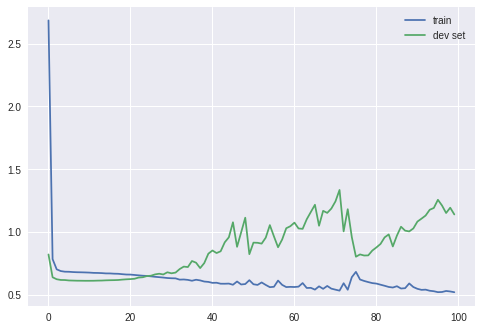

Normalized confusion matrix
[[0.78883072 0.21116928]
 [0.74098361 0.25901639]]


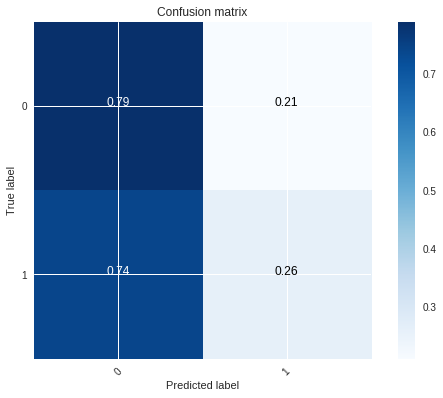

dropout parameter: 0.01063068248201565
regularization parameter: 0.025648779026287868
Train Accuracy: 78.63%
CV Accuracy: 64.96%


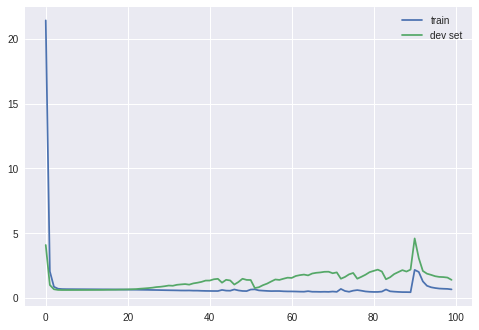

Normalized confusion matrix
[[0.70680628 0.29319372]
 [0.62786885 0.37213115]]


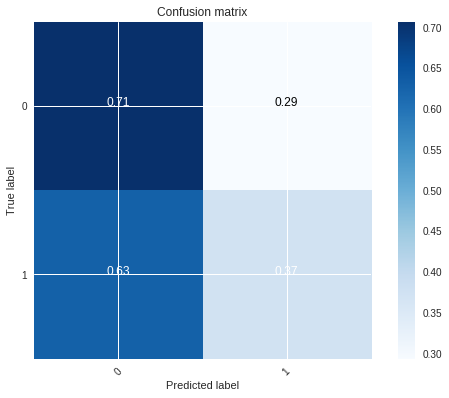

dropout parameter: 0.001172621027766866
regularization parameter: 0.4681413442861666
Train Accuracy: 70.98%
CV Accuracy: 59.98%


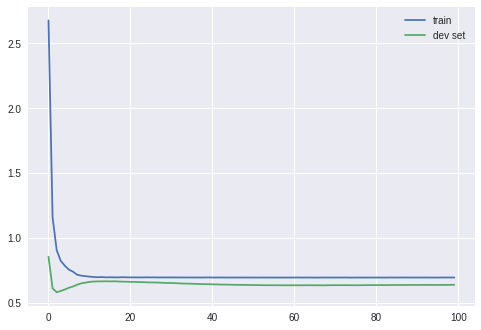

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


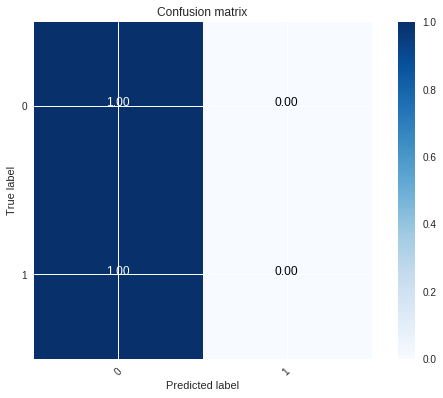

dropout parameter: 0.9057009826340919
regularization parameter: 0.02333582192935582
Train Accuracy: 69.15%
CV Accuracy: 73.81%


KeyboardInterrupt: ignored

In [51]:
#hyperparameter search
#dropout and weight regularization
dropouts = []
regs = []
cv_accs = []
train_accs = []
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

grid = 10**(np.random.rand(20,2)*3-3)

for i in range(20):
        j = grid[i,0]
        k = grid[i,1]
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=False))
        model.add(Dense(1))
        nl += 1
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        dropouts.append(j)
        regs.append(k)
        train_accs.append(train_scores[1]*100)
        cv_accs.append(cv_scores[1]*100)
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=train_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Train Accuracy (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=cv_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Dev Accuracy (100 epochs)')
plt.colorbar()
plt.show()

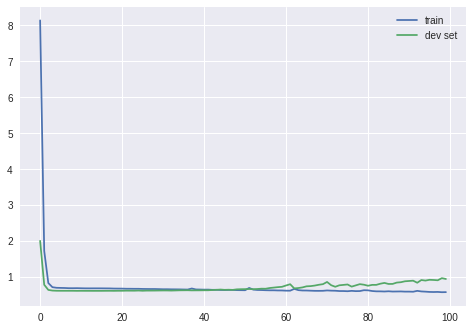

Normalized confusion matrix
[[0.81966259 0.18033741]
 [0.76721311 0.23278689]]


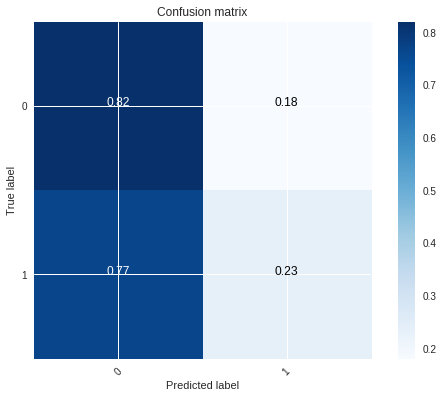

dropout parameter: 0.04919825922242272
regularization parameter: 0.1412633952343624
Train Accuracy: 76.87%
CV Accuracy: 66.60%
Train F1 Score: 0.5123552123552124
CV F1 Score: 0.2674199623352166


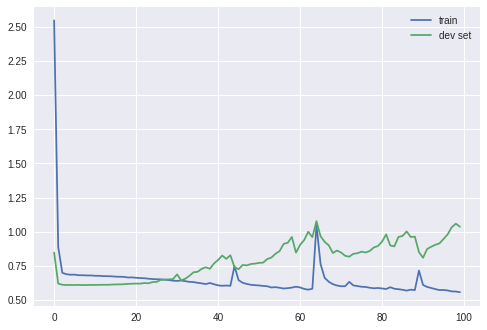

Normalized confusion matrix
[[0.79930192 0.20069808]
 [0.7442623  0.2557377 ]]


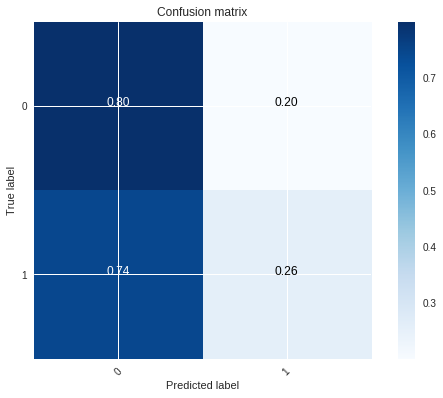

dropout parameter: 0.019578820537879845
regularization parameter: 0.014744595140940555
Train Accuracy: 76.58%
CV Accuracy: 65.44%
Train F1 Score: 0.5428156748911466
CV F1 Score: 0.28082808280828087


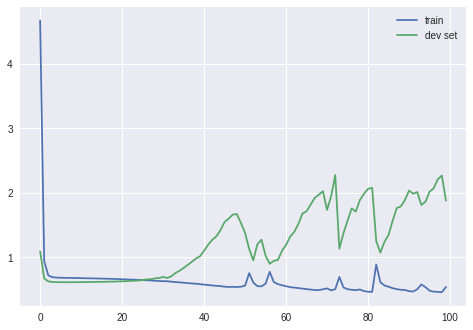

Normalized confusion matrix
[[0.76905177 0.23094823]
 [0.74590164 0.25409836]]


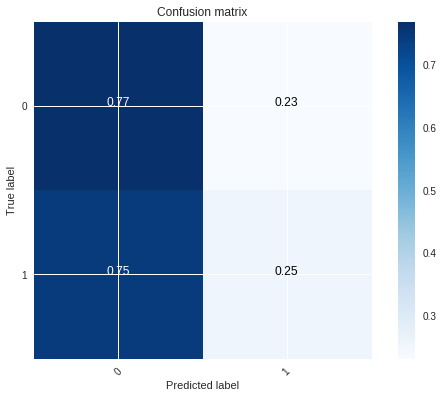

dropout parameter: 0.0015064030386268761
regularization parameter: 0.0680570760457944
Train Accuracy: 72.64%
CV Accuracy: 59.42%
Train F1 Score: 0.5919489271147367
CV F1 Score: 0.26678141135972466


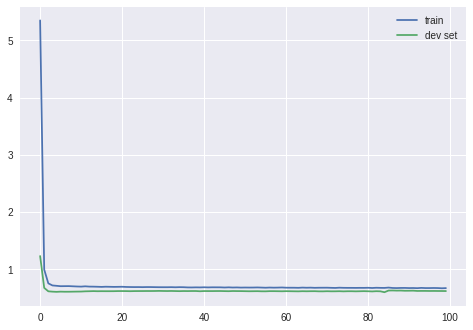

Normalized confusion matrix
[[0.92961024 0.07038976]
 [0.88852459 0.11147541]]


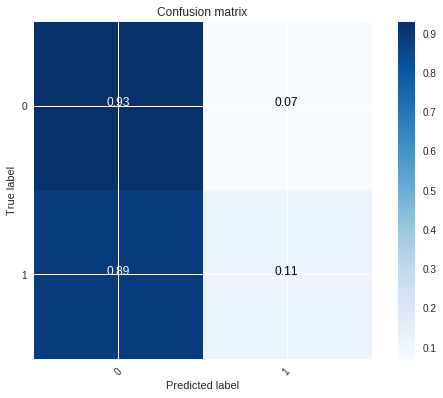

dropout parameter: 0.38127654681329254
regularization parameter: 0.09117836438284396
Train Accuracy: 72.06%
CV Accuracy: 71.53%
Train F1 Score: 0.2778040700425935
CV F1 Score: 0.1702127659574468


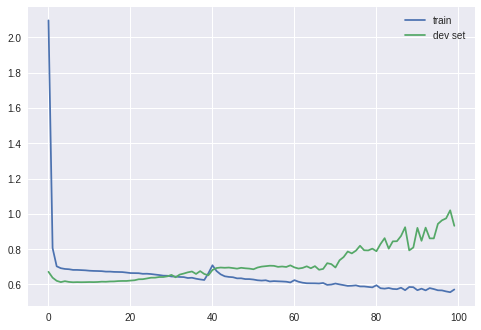

Normalized confusion matrix
[[0.80919139 0.19080861]
 [0.75245902 0.24754098]]


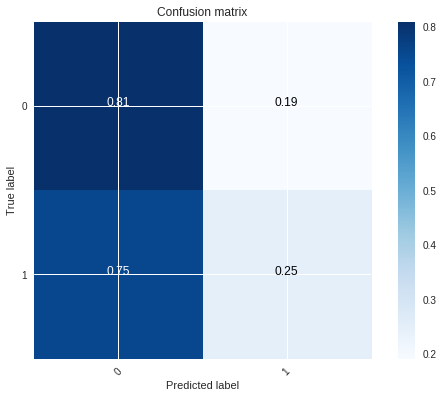

dropout parameter: 0.0278517830868542
regularization parameter: 0.0056353601835211885
Train Accuracy: 78.31%
CV Accuracy: 66.21%
Train F1 Score: 0.5560165975103734
CV F1 Score: 0.2773186409550046


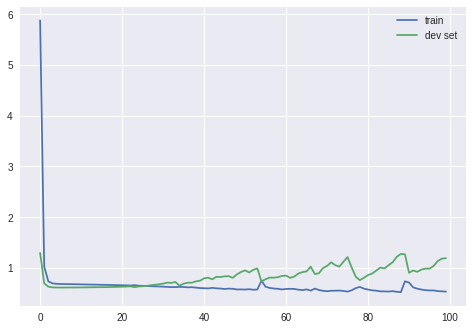

Normalized confusion matrix
[[0.79348458 0.20651542]
 [0.73114754 0.26885246]]


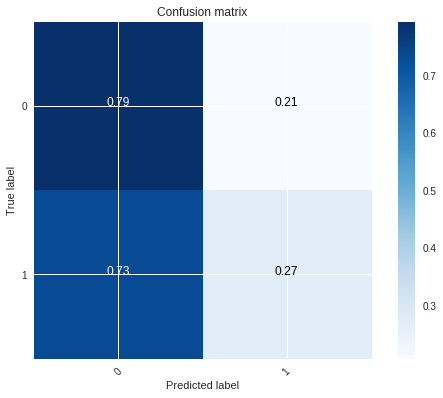

dropout parameter: 0.01173611344495565
regularization parameter: 0.09669202344045078
Train Accuracy: 78.06%
CV Accuracy: 65.48%
Train F1 Score: 0.5800571837026447
CV F1 Score: 0.29052258635961026


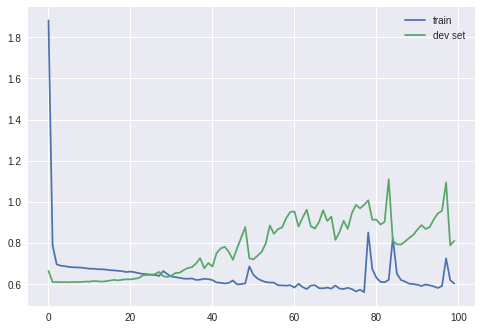

Normalized confusion matrix
[[0.64921466 0.35078534]
 [0.60655738 0.39344262]]


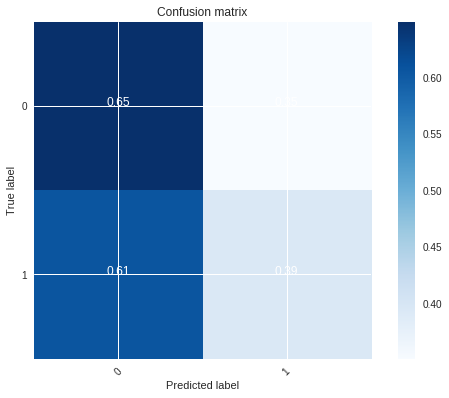

dropout parameter: 0.027047666606009272
regularization parameter: 0.0027180661123740457
Train Accuracy: 71.82%
CV Accuracy: 58.22%
Train F1 Score: 0.5575043128234618
CV F1 Score: 0.3303509979353063


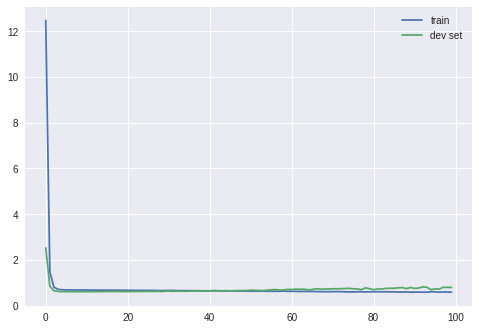

Normalized confusion matrix
[[0.76497964 0.23502036]
 [0.71639344 0.28360656]]


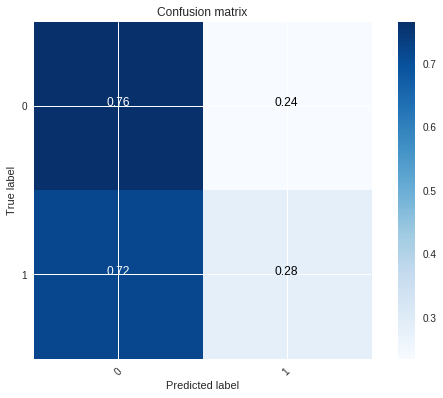

dropout parameter: 0.10311938427921376
regularization parameter: 0.2563811642095579
Train Accuracy: 77.79%
CV Accuracy: 63.89%
Train F1 Score: 0.5694000709975151
CV F1 Score: 0.2914911541701769


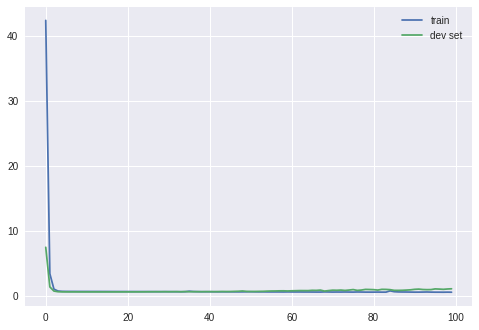

Normalized confusion matrix
[[0.80802792 0.19197208]
 [0.75737705 0.24262295]]


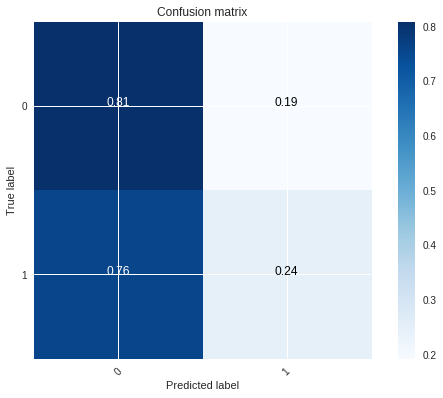

dropout parameter: 0.02914105756511534
regularization parameter: 0.9494853187537692
Train Accuracy: 77.29%
CV Accuracy: 65.91%
Train F1 Score: 0.5419522133728468
CV F1 Score: 0.27205882352941174


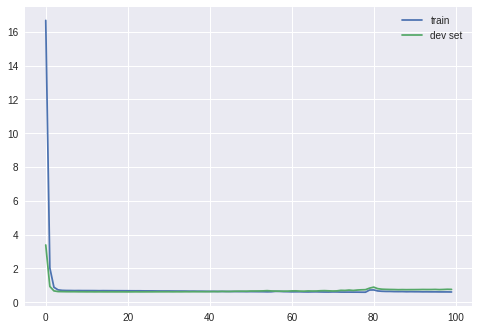

Normalized confusion matrix
[[0.62361838 0.37638162]
 [0.5557377  0.4442623 ]]


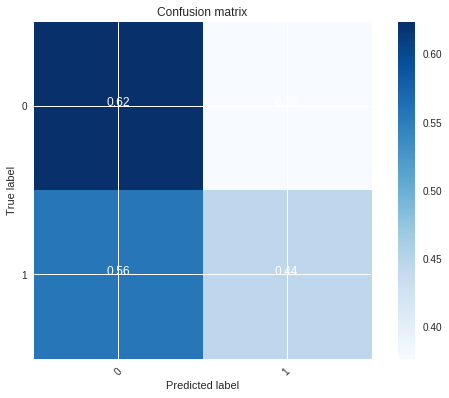

dropout parameter: 0.05986290414967916
regularization parameter: 0.3406738921622374
Train Accuracy: 71.01%
CV Accuracy: 57.66%
Train F1 Score: 0.5635937715309356
CV F1 Score: 0.35471204188481675


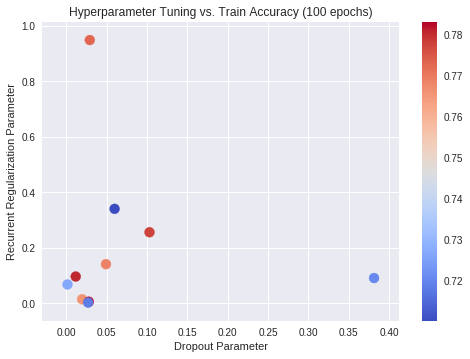

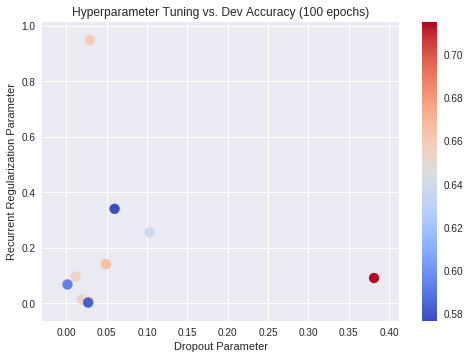

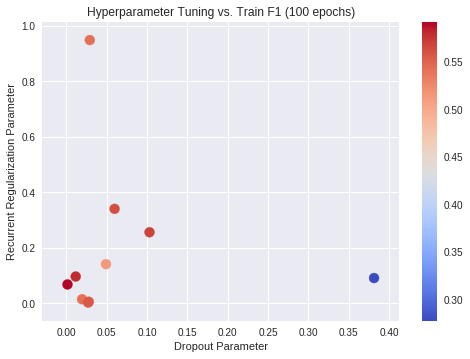

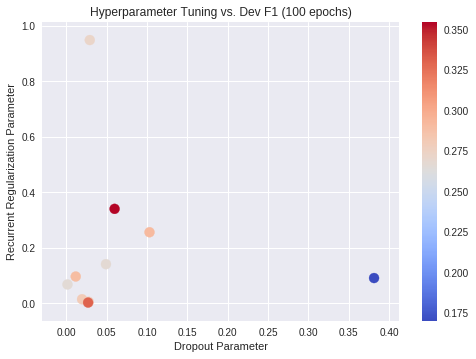

In [10]:
#hyperparameter search
#dropout and weight regularization
#part I
dropouts = []
regs = []
cv_accs = []
train_accs = []
cv_f1 = []
train_f1 = []
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

grid = 10**(np.random.rand(20,2)*3-3)

for i in range(10):
        j = grid[i,0]
        k = grid[i,1]
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=False))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        train_predictions = model.predict_classes(tl_train_x, batch_size=72, verbose=0)
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        m = f1_score([int(i) for i in tl_train_y],train_predictions)
        l = f1_score([int(i) for i in tl_cv_y],cv_predictions)
        print("Train F1 Score: "+str(m))
        print("CV F1 Score: "+str(l))
        dropouts.append(j)
        regs.append(k)
        train_accs.append(train_scores[1])
        cv_accs.append(cv_scores[1])
        train_f1.append(m)
        cv_f1.append(l)
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=train_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Train Accuracy (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=cv_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Dev Accuracy (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=train_f1, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Train F1 (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=cv_f1, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Dev F1 (100 epochs)')
plt.colorbar()
plt.show()

In [12]:
print(train_accs)
print(cv_accs)
print(train_f1)
print(cv_f1)
print(dropouts)
print(regs)


[0.7687448527550377, 0.7658152519854435, 0.7263572313110438, 0.720589581916896, 0.7831181877918605, 0.7805547911333075, 0.7182092842444127, 0.7778998430663824, 0.7728645984565318, 0.7100613380617835]
[0.6659510515953349, 0.6543580899171022, 0.5942464525886951, 0.7153284695077833, 0.6620867342946866, 0.6547874626349666, 0.5822241301698304, 0.6389008175922393, 0.6590811498383178, 0.5766423355104996]
[0.5123552123552124, 0.5428156748911466, 0.5919489271147367, 0.2778040700425935, 0.5560165975103734, 0.5800571837026447, 0.5575043128234618, 0.5694000709975151, 0.5419522133728468, 0.5635937715309356]
[0.2674199623352166, 0.28082808280828087, 0.26678141135972466, 0.1702127659574468, 0.2773186409550046, 0.29052258635961026, 0.3303509979353063, 0.2914911541701769, 0.27205882352941174, 0.35471204188481675]
[0.04919825922242272, 0.019578820537879845, 0.0015064030386268761, 0.38127654681329254, 0.0278517830868542, 0.01173611344495565, 0.027047666606009272, 0.10311938427921376, 0.02914105756511534,

In [0]:
train_accs = [0.7687448527550377, 0.7658152519854435, 0.7263572313110438, 0.720589581916896, 0.7831181877918605, 0.7805547911333075, 0.7182092842444127, 0.7778998430663824, 0.7728645984565318, 0.7100613380617835]
cv_accs = [0.6659510515953349, 0.6543580899171022, 0.5942464525886951, 0.7153284695077833, 0.6620867342946866, 0.6547874626349666, 0.5822241301698304, 0.6389008175922393, 0.6590811498383178, 0.5766423355104996]
train_f1 = [0.5123552123552124, 0.5428156748911466, 0.5919489271147367, 0.2778040700425935, 0.5560165975103734, 0.5800571837026447, 0.5575043128234618, 0.5694000709975151, 0.5419522133728468, 0.5635937715309356]
cv_f1 = [0.2674199623352166, 0.28082808280828087, 0.26678141135972466, 0.1702127659574468, 0.2773186409550046, 0.29052258635961026, 0.3303509979353063, 0.2914911541701769, 0.27205882352941174, 0.35471204188481675]
dropouts = [0.04919825922242272, 0.019578820537879845, 0.0015064030386268761, 0.38127654681329254, 0.0278517830868542, 0.01173611344495565, 0.027047666606009272, 0.10311938427921376, 0.02914105756511534, 0.05986290414967916]
regs = [0.1412633952343624, 0.014744595140940555, 0.0680570760457944, 0.09117836438284396, 0.0056353601835211885, 0.09669202344045078, 0.0027180661123740457, 0.2563811642095579, 0.9494853187537692, 0.3406738921622374]

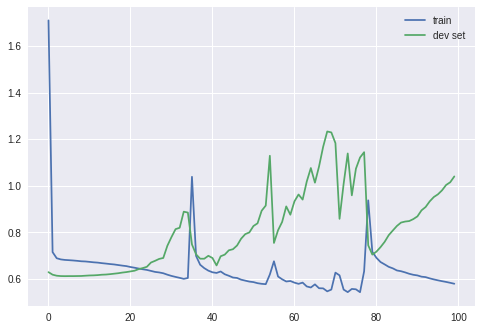

Normalized confusion matrix
[[0.67830134 0.32169866]
 [0.6295082  0.3704918 ]]


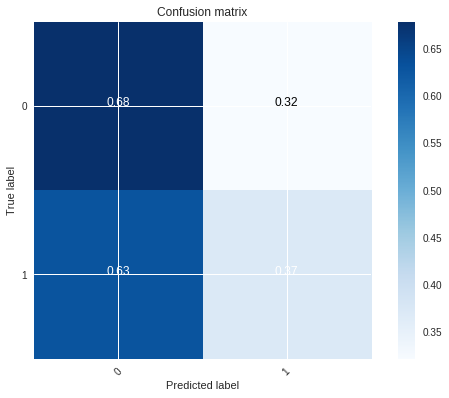

dropout parameter: 0.0037049179146190557
regularization parameter: 0.0029887505215880563
Train Accuracy: 73.46%
CV Accuracy: 59.73%
Train F1 Score: 0.559025133282559
CV F1 Score: 0.3254139668826494


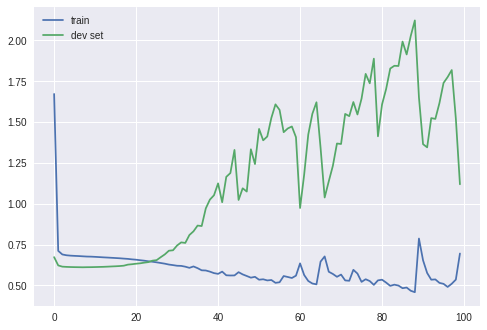

Normalized confusion matrix
[[0.76439791 0.23560209]
 [0.70655738 0.29344262]]


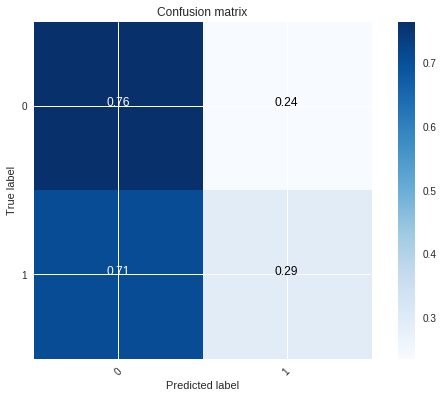

dropout parameter: 0.002531560621170089
regularization parameter: 0.0037991371841516225
Train Accuracy: 74.05%
CV Accuracy: 63.33%
Train F1 Score: 0.5127382861215036
CV F1 Score: 0.2998324958123953


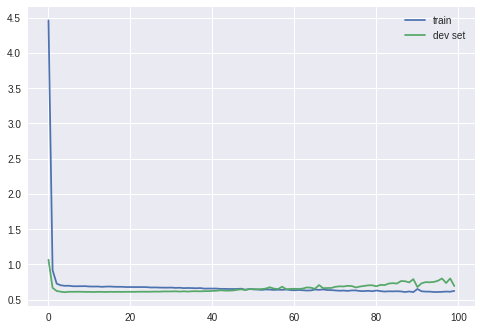

Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.69180328 0.30819672]]


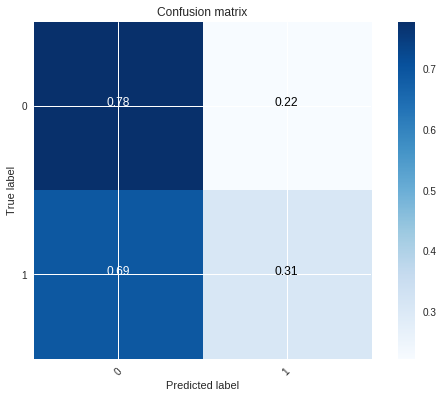

dropout parameter: 0.10734920923577758
regularization parameter: 0.06791905908097597
Train Accuracy: 75.58%
CV Accuracy: 65.48%
Train F1 Score: 0.5270438020925695
CV F1 Score: 0.31864406779661014


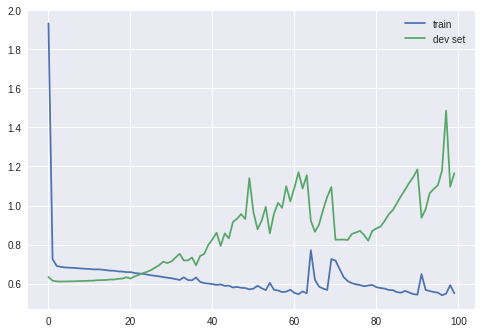

Normalized confusion matrix
[[0.76905177 0.23094823]
 [0.72459016 0.27540984]]


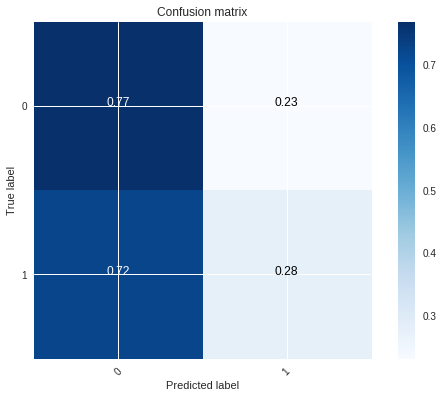

dropout parameter: 0.016371617860432897
regularization parameter: 0.0054659544160957285
Train Accuracy: 77.86%
CV Accuracy: 63.89%
Train F1 Score: 0.5908936459395175
CV F1 Score: 0.28595744680851065


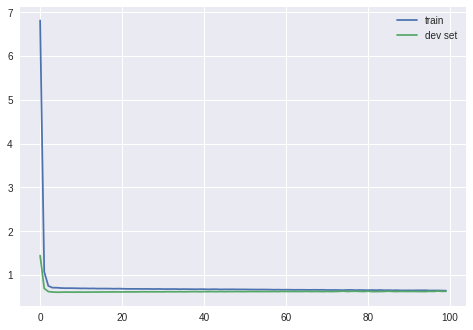

Normalized confusion matrix
[[0.85747528 0.14252472]
 [0.81147541 0.18852459]]


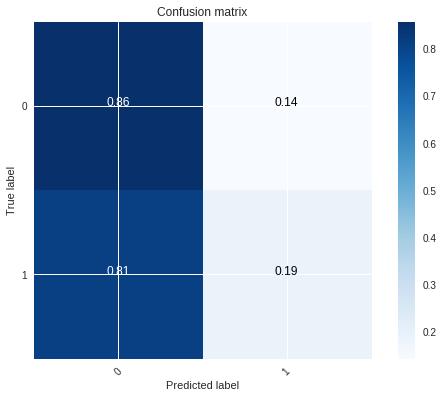

dropout parameter: 0.25864952200036184
regularization parameter: 0.12154160376267008
Train Accuracy: 73.62%
CV Accuracy: 68.23%
Train F1 Score: 0.40454545454545454
CV F1 Score: 0.23711340206185566


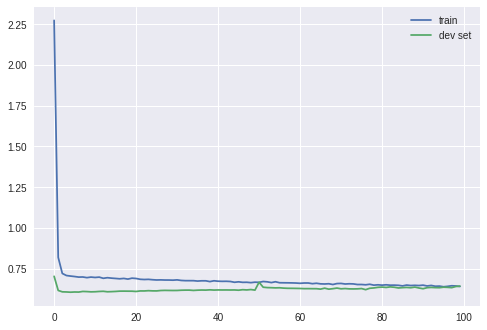

Normalized confusion matrix
[[0.83769634 0.16230366]
 [0.79016393 0.20983607]]


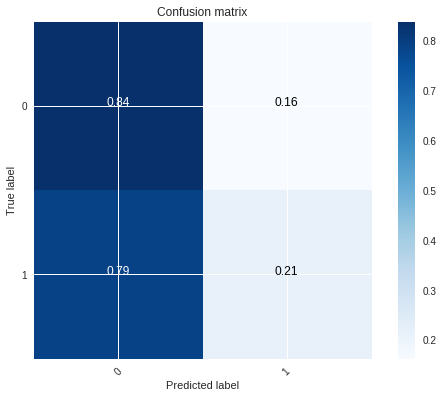

dropout parameter: 0.21219531900936656
regularization parameter: 0.015284980364964297
Train Accuracy: 74.82%
CV Accuracy: 67.33%
Train F1 Score: 0.44241686942416875
CV F1 Score: 0.25172074729596855


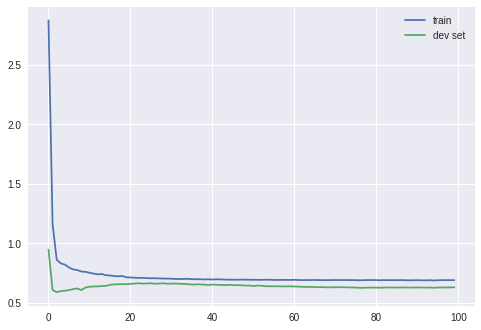

Normalized confusion matrix
[[0.97673066 0.02326934]
 [0.97868852 0.02131148]]


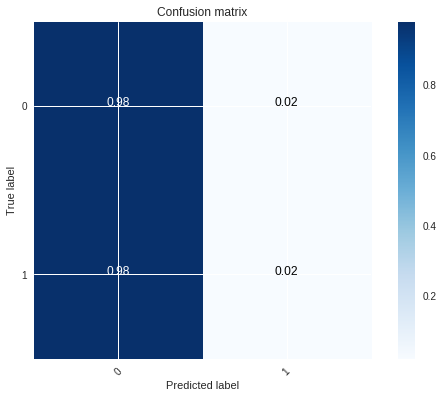

dropout parameter: 0.6495594252772469
regularization parameter: 0.02324214373500799
Train Accuracy: 69.38%
CV Accuracy: 72.65%
Train F1 Score: 0.054817745125741744
CV F1 Score: 0.039215686274509796


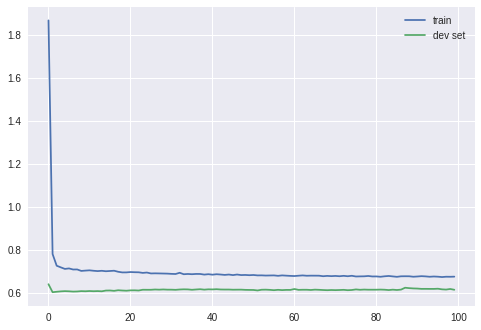

Normalized confusion matrix
[[0.93426411 0.06573589]
 [0.89344262 0.10655738]]


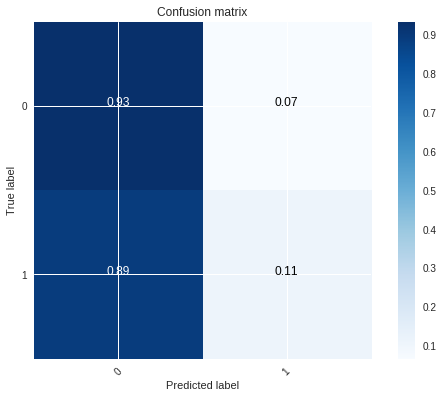

dropout parameter: 0.4155240156270351
regularization parameter: 0.006563085478262518
Train Accuracy: 71.47%
CV Accuracy: 71.75%
Train F1 Score: 0.24221789883268485
CV F1 Score: 0.1649746192893401


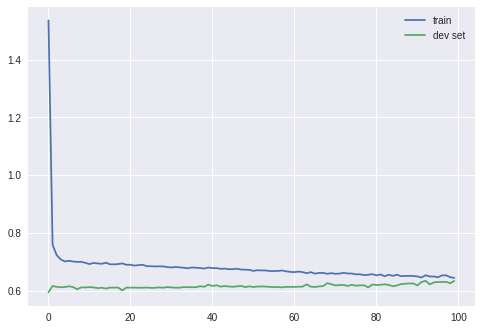

Normalized confusion matrix
[[0.87609075 0.12390925]
 [0.82295082 0.17704918]]


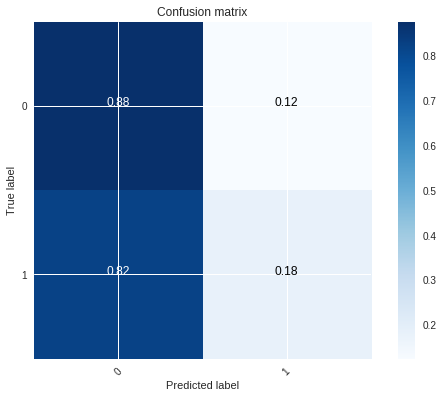

dropout parameter: 0.23565779168408954
regularization parameter: 0.001007489302647152
Train Accuracy: 74.63%
CV Accuracy: 69.30%
Train F1 Score: 0.40574737293587815
CV F1 Score: 0.23200859291084855


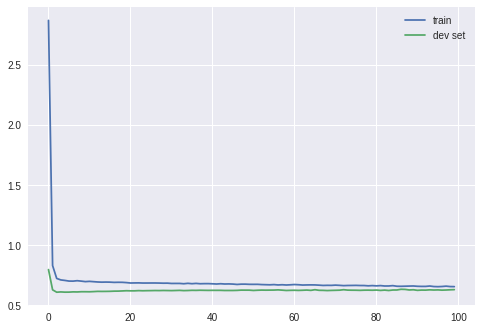

Normalized confusion matrix
[[0.84933101 0.15066899]
 [0.80163934 0.19836066]]


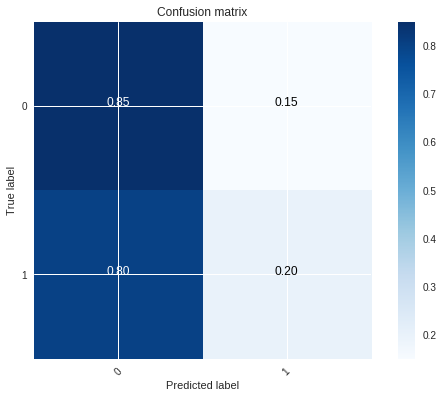

dropout parameter: 0.29443968452709407
regularization parameter: 0.029380382675399015
Train Accuracy: 73.43%
CV Accuracy: 67.88%
Train F1 Score: 0.3936481404095278
CV F1 Score: 0.24444444444444446


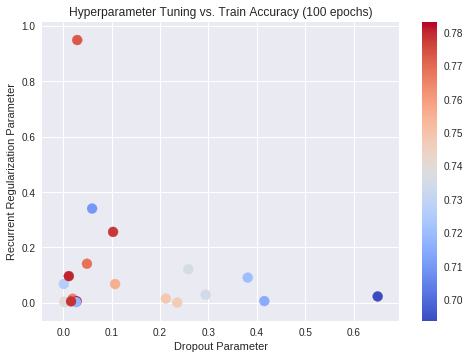

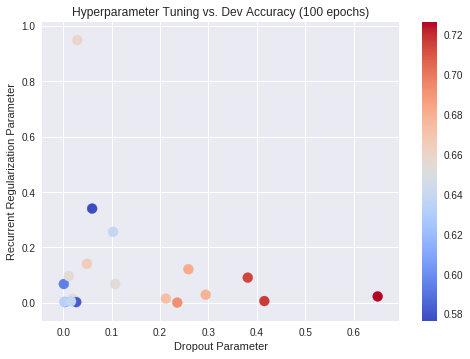

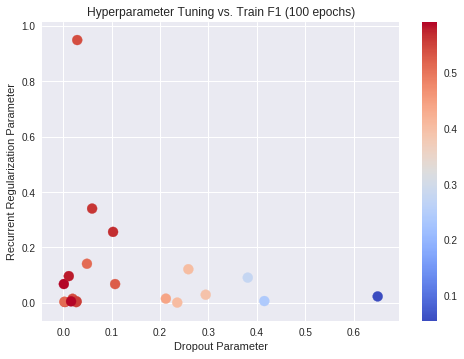

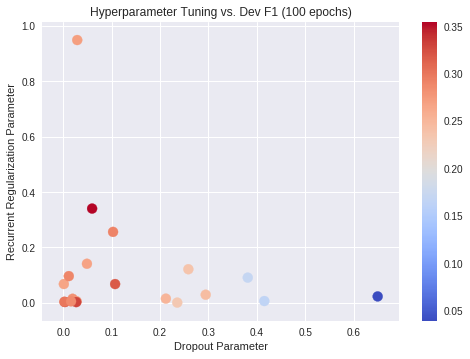

In [12]:
#hyperparameter search
#dropout and weight regularization
#part II
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weight_o = class_weight.compute_class_weight('balanced', np.unique(tl_train_y), tl_train_y)
class_weight_dict = dict(enumerate(class_weight_o))

grid = 10**(np.random.rand(20,2)*3-3)

for i in range(10):
        j = grid[i,0]
        k = grid[i,1]
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=False))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=100, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        train_predictions = model.predict_classes(tl_train_x, batch_size=72, verbose=0)
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        m = f1_score([int(i) for i in tl_train_y],train_predictions)
        l = f1_score([int(i) for i in tl_cv_y],cv_predictions)
        print("Train F1 Score: "+str(m))
        print("CV F1 Score: "+str(l))
        dropouts.append(j)
        regs.append(k)
        train_accs.append(train_scores[1])
        cv_accs.append(cv_scores[1])
        train_f1.append(m)
        cv_f1.append(l)
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=train_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Train Accuracy (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=cv_accs, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Dev Accuracy (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=train_f1, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Train F1 (100 epochs)')
plt.colorbar()
plt.show()
jet=plt.get_cmap('coolwarm')
plt.scatter(dropouts, regs, s=100, c=cv_f1, cmap=jet)
plt.xlabel('Dropout Parameter')
plt.ylabel('Recurrent Regularization Parameter')
plt.title('Hyperparameter Tuning vs. Dev F1 (100 epochs)')
plt.colorbar()
plt.show()

In [0]:
#store dropout parameter: 0.10734920923577758
#store regularization parameter: 0.06791905908097597
#store dropout parameter 0.038923628052220265
#store regularization parameter = 0.2757174514647895

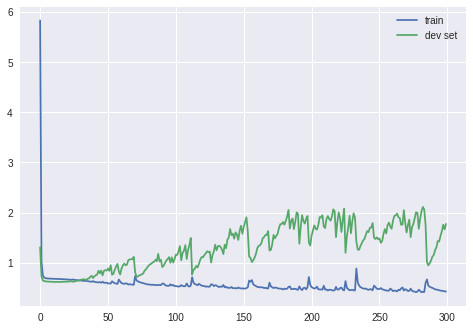

Normalized confusion matrix
[[0.68702734 0.31297266]
 [0.62131148 0.37868852]]


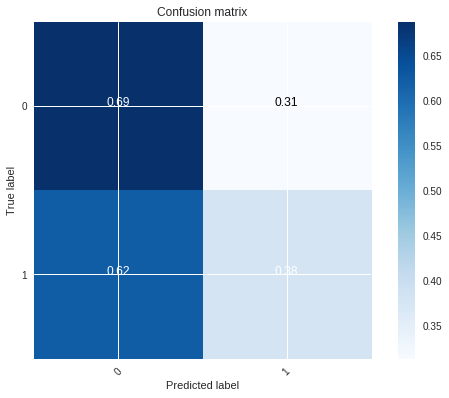

dropout parameter: 0.01173611344495565
regularization parameter: 0.09669202344045078
Train Accuracy: 83.59%
CV Accuracy: 60.63%
Train F1 Score: 0.7321375186846039
CV F1 Score: 0.33502538071065985


In [13]:
        ##fit tuned model 1
        j =  0.01173611344495565
        k = 0.09669202344045078
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=False))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=300, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        train_predictions = model.predict_classes(tl_train_x, batch_size=72, verbose=0)
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        m = f1_score([int(i) for i in tl_train_y],train_predictions)
        l = f1_score([int(i) for i in tl_cv_y],cv_predictions)
        print("Train F1 Score: "+str(m))
        print("CV F1 Score: "+str(l))


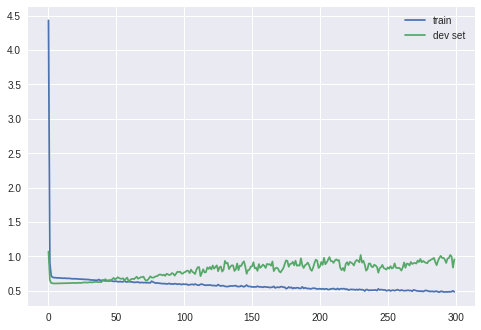

Normalized confusion matrix
[[0.76323444 0.23676556]
 [0.69672131 0.30327869]]


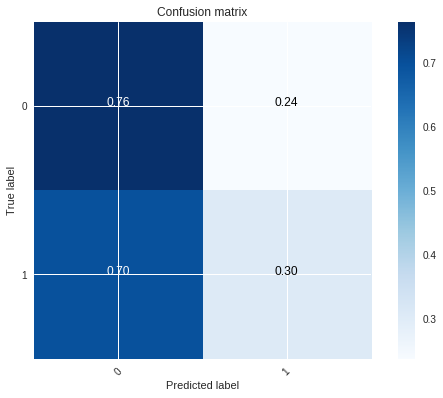

dropout parameter: 0.10734920923577758
regularization parameter: 0.06791905908097597
Train Accuracy: 86.87%
CV Accuracy: 64.28%
Train F1 Score: 0.7715105162523901
CV F1 Score: 0.30782029950083195


In [13]:
        ##fit tuned model
        j =  0.10734920923577758
        k = 0.06791905908097597
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=False))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=300, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        train_predictions = model.predict_classes(tl_train_x, batch_size=72, verbose=0)
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        m = f1_score([int(i) for i in tl_train_y],train_predictions)
        l = f1_score([int(i) for i in tl_cv_y],cv_predictions)
        print("Train F1 Score: "+str(m))
        print("CV F1 Score: "+str(l))


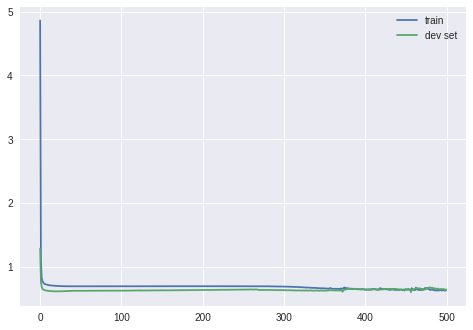

Normalized confusion matrix
[[0.83595113 0.16404887]
 [0.77540984 0.22459016]]


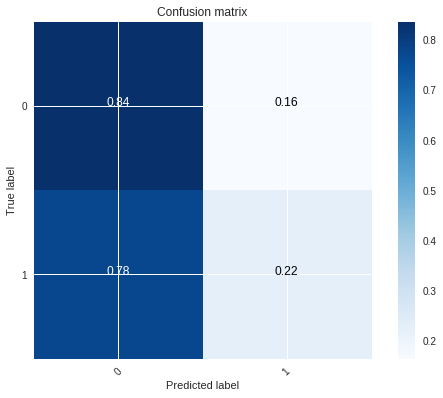

dropout parameter: 0.10734920923577758
regularization parameter: 0.06791905908097597
Train Accuracy: 80.10%
CV Accuracy: 67.58%
Train F1 Score: 0.584321223709369
CV F1 Score: 0.26627793974732755


In [27]:
        ##fit tuned model with kernel regularization
        j = 0.10734920923577758
        k = 0.06791905908097597
        #j =  0.10311938427921376
        #k = 0.2563811642095579
        model = Sequential()
        model.add(LSTM(60, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),return_sequences=True))
        model.add(LSTM(50, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),kernel_regularizer=regularizers.l2(.005),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(20, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),kernel_regularizer=regularizers.l2(.005),return_sequences=True))
        model.add(LeakyReLU())
        model.add(LSTM(10, input_shape=(tl_train_x.shape[1], tl_train_x.shape[2]),dropout=j,recurrent_regularizer=regularizers.l2(k),kernel_regularizer=regularizers.l2(.005),return_sequences=False))
        model.add(Dense(1))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(tl_train_x, tl_train_y, epochs=500, batch_size=72, class_weight=class_weight_dict, validation_data=(tl_cv_X, tl_cv_y), verbose=0, shuffle=False)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='dev set')
        plt.legend()
        plt.show()
        #confusion matrix code from https://www.youtube.com/watch?v=km7pxKy4UHU&feature=youtu.be
        train_predictions = model.predict_classes(tl_train_x, batch_size=72, verbose=0)
        cv_predictions = model.predict_classes(tl_cv_X, batch_size=72, verbose=0)
        cm = confusion_matrix([int(i) for i in tl_cv_y],cv_predictions)
        plot_confusion_matrix(cm,classes=[0,1],normalize=True)
        train_scores = model.evaluate(tl_train_x, tl_train_y, batch_size=72, verbose=0)
        cv_scores = model.evaluate(tl_cv_X, tl_cv_y, batch_size=72, verbose=0)
        print("dropout parameter: "+str(j))
        print("regularization parameter: "+str(k))
        print("Train Accuracy: %.2f%%" % (train_scores[1]*100))
        print("CV Accuracy: %.2f%%" % (cv_scores[1]*100))
        m = f1_score([int(i) for i in tl_train_y],train_predictions)
        l = f1_score([int(i) for i in tl_cv_y],cv_predictions)
        print("Train F1 Score: "+str(m))
        print("CV F1 Score: "+str(l))
